## Side Approach : Merging Polylines efficiently

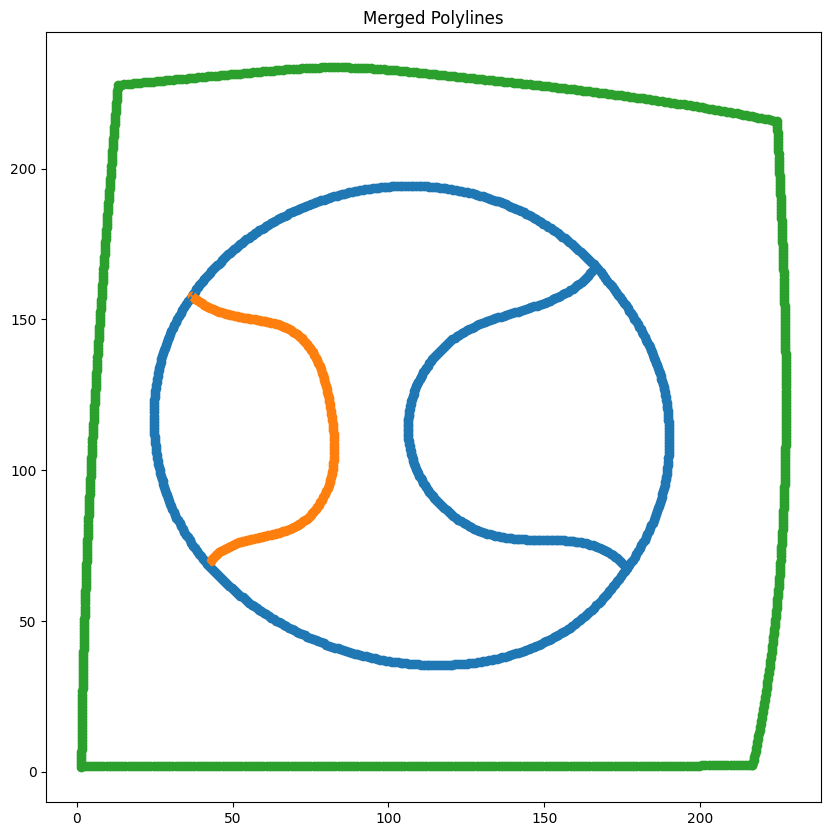

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

def merge_polylines(path_XYs, threshold=1.0):
    merged_polylines = []
    polylines = [polyline for sublist in path_XYs for polyline in sublist]
    
    while polylines:
        current_polyline = polylines.pop(0)
        merged = False
        for i in range(len(polylines)):
            polyline = polylines[i]
            if np.linalg.norm(current_polyline[-1] - polyline[0]) < threshold:
                current_polyline = np.vstack([current_polyline, polyline[1:]])
                polylines.pop(i)
                merged = True
                break
            elif np.linalg.norm(current_polyline[0] - polyline[-1]) < threshold:
                current_polyline = np.vstack([polyline, current_polyline[1:]])
                polylines.pop(i)
                merged = True
                break
            elif np.linalg.norm(current_polyline[-1] - polyline[-1]) < threshold:
                current_polyline = np.vstack([current_polyline, polyline[::-1][1:]])
                polylines.pop(i)
                merged = True
                break
            elif np.linalg.norm(current_polyline[0] - polyline[0]) < threshold:
                current_polyline = np.vstack([current_polyline[::-1], polyline[1:]])
                polylines.pop(i)
                merged = True
                break
        if merged:
            polylines.insert(0, current_polyline)
        else:
            merged_polylines.append(current_polyline)
    
    return merged_polylines

# Load and merge polylines from CSV
csv_path = r'assets/frag0.csv'
path_XYs = read_csv(csv_path)
merged_polylines = merge_polylines(path_XYs, threshold=1.0)

# Visualize merged polylines
plt.figure(figsize=(10, 10))
c=0
for polyline in merged_polylines:
    plt.plot(polyline[:, 0], polyline[:, 1],label=str(c))
    plt.scatter(polyline[:, 0], polyline[:, 1],label=str(c))
    c+=1
plt.title("Merged Polylines")
plt.show()


In [3]:
def calculate_lengths(polyline):
    lengths = [np.linalg.norm(polyline[i] - polyline[i - 1]) for i in range(1, len(polyline))]
    return lengths

def calculate_angles(polyline):
    angles = []
    for i in range(1, len(polyline) - 1):
        vec1 = polyline[i] - polyline[i - 1]
        vec2 = polyline[i + 1] - polyline[i]
        angle = np.arccos(np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2)))
        angles.append(np.degrees(angle))
    return angles

# Test on a sample merged polyline
sample_polyline = merged_polylines[0]
lengths = calculate_lengths(sample_polyline)
angles = calculate_angles(sample_polyline)

print("Lengths:", lengths)
print("Angles:", angles)

# Function to check if lengths are nearly equal
def check_lengths(lengths, tolerance=0.1):
    mean_length = np.mean(lengths)
    return all(abs(length - mean_length) < tolerance for length in lengths)

# Function to check if angles are close to 90 degrees (pi/2 radians)
def check_angles(angles, tolerance=np.pi/18):  # pi/18 is 10 degrees
    target_angle = np.pi / 2
    return all(abs(angle - target_angle) < tolerance for angle in angles)

# Define tolerances
length_tolerance = 0.05
angle_tolerance = np.pi / 36  # 10 degrees

# Check lengths and angles
if check_lengths(lengths, length_tolerance) and check_angles(angles, angle_tolerance):
    print("Shape is likely a square.")
else:
    print("Shape is not identified as a square.")

# Adjust the tolerance as needed
length_tolerance = 0.05  # Adjust based on your data
angle_tolerance = np.pi / 36  # Adjust based on your data


Lengths: [1.0562446134413335, 1.0560779911311182, 1.0557249051515278, 1.0552155180992624, 1.0545486085002551, 1.0537435291913626, 1.0528152130733033, 1.051778954676232, 1.0506639686088965, 1.0494559219419992, 1.0482106726656801, 1.0469189491697484, 1.04560614325703, 1.044310548247925, 1.0430257953590036, 1.041800184673944, 1.0406417797457426, 1.0395829907832843, 1.0386519849077167, 1.0378472518354096, 1.037234790546769, 1.0368196431664947, 1.0366489997187847, 1.0367117866864473, 1.0370884595711627, 0.8836544326939536, 0.8829076275224557, 0.8822632549791232, 0.88172615887845, 0.8812952238691112, 0.8809671599363832, 0.8807236032038142, 0.8805762198498797, 0.8805350842185619, 0.8805569125293842, 0.8806784893790864, 0.8808798230215321, 0.8811509255008266, 0.8814954093931264, 0.8819290284738346, 0.8824053029708051, 0.8829458230175856, 0.8835677033033237, 0.8842339026137821, 0.8849584769810619, 0.8857384978202277, 0.8865579198592876, 0.8874388993331606, 0.8883523542899777, 0.8893110673219753